In [42]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore') 

In [43]:
df = pd.read_csv('C:/Users/Swalllow1219/Desktop/Kaggle_Practice/Data/london_merged.csv', parse_dates=['timestamp'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [44]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [45]:
print('Data Shape : ', df.shape)
print('Data Type : ', df.dtypes)
print('Data Columns : ', df.columns)

Data Shape :  (17414, 10)
Data Type :  timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object
Data Columns :  Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')


In [46]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4


dayofweek
monday = 0
...
sunday = 6

In [47]:
df['year'].value_counts()

2016    8699
2015    8643
2017      72
Name: year, dtype: int64

In [48]:
df['year'].value_counts(sort=False)

2015    8643
2016    8699
2017      72
Name: year, dtype: int64

In [49]:
df['month'].value_counts()

5     1488
1     1487
8     1484
12    1484
7     1481
10    1479
3     1468
4     1438
11    1430
6     1422
9     1394
2     1359
Name: month, dtype: int64

In [50]:
df['dayofweek'].value_counts()

0    2508
6    2505
1    2505
3    2492
2    2489
5    2465
4    2450
Name: dayofweek, dtype: int64

In [51]:
df['weather_code'].value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

<AxesSubplot:xlabel='year', ylabel='cnt'>

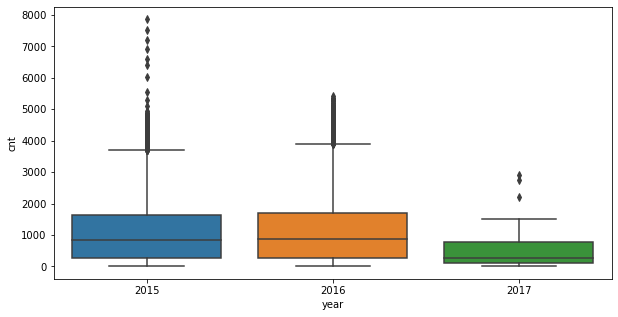

In [52]:
a, b = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(df['year'],df['cnt'])

<AxesSubplot:xlabel='month', ylabel='cnt'>

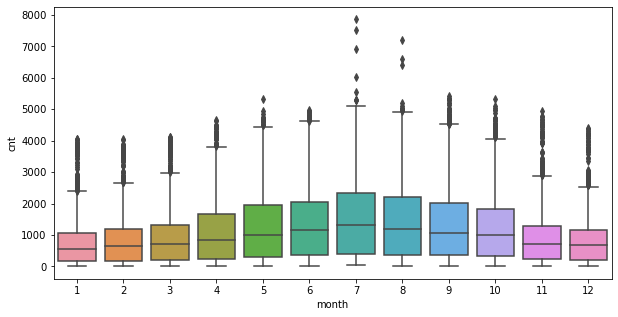

In [53]:
a, b = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(df['month'],df['cnt'])

<AxesSubplot:xlabel='dayofweek', ylabel='cnt'>

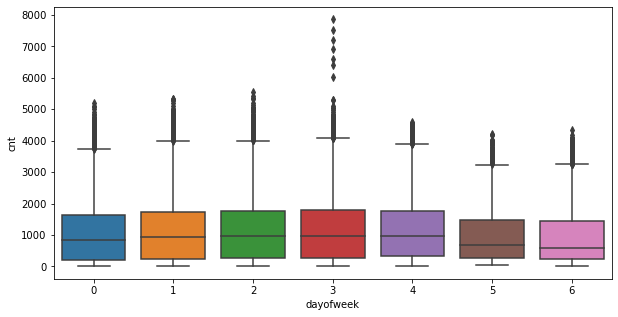

In [54]:
a, b = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(df['dayofweek'],df['cnt'])

<AxesSubplot:xlabel='hour', ylabel='cnt'>

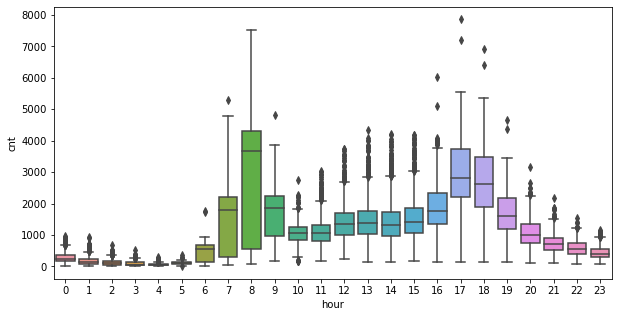

In [55]:
a, b = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(df['hour'],df['cnt'])

In [56]:
# Create Graph Generate

def plot_bar(data, feature):
    fig = plt.figure(figsize=(12,3))
    sns.barplot(x=feature, y='cnt', data=data, palette='Set3', orient='v')

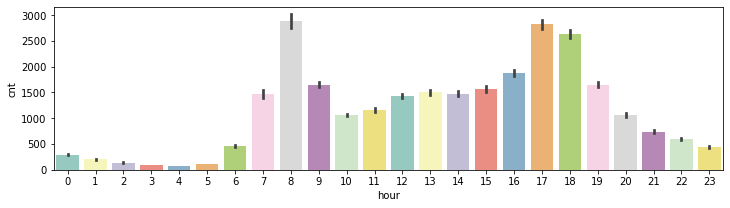

In [57]:
plot_bar(df, 'hour')

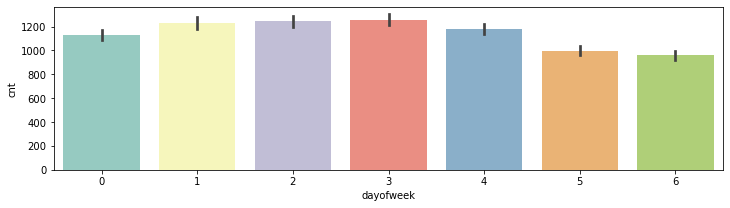

In [58]:
plot_bar(df, 'dayofweek')

In [59]:
# Delete Outlier
# Method Sigma

def is_outliers(s):
    lower_limit = s.mean() - (s.std()*3)
    upper_limit = s.mean() + (s.std()*3)
    return ~s.between(lower_limit, upper_limit)

In [60]:
df_out = df[~df.groupby('hour')['cnt'].apply(is_outliers)]
print('Before Outliers : ', df.shape)
print('After Outliers : ', df_out.shape)

Before Outliers :  (17414, 14)
After Outliers :  (17265, 14)


In [61]:
df_out['weather_code'] = df_out['weather_code'].astype('category')
df_out['season'] = df_out['season'].astype('category')
df_out['year'] = df_out['year'].astype('category')
df_out['month'] = df_out['month'].astype('category')
df_out['hour'] = df_out['hour'].astype('category')

In [62]:
df_out.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code          category
is_holiday             float64
is_weekend             float64
season                category
year                  category
month                 category
dayofweek                int64
hour                  category
dtype: object

In [63]:
# Create Dummies
df_out = pd.get_dummies(df_out, columns=['weather_code', 'season', 'year', 'month', 'hour'])
df_out.head()

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayofweek,weather_code_1.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,6,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df_out.shape

(17265, 59)

In [65]:
df_y = df_out['cnt']
df_x = df_out.drop(['timestamp', 'cnt'], axis=1)
df_x.head()

,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayofweek,weather_code_1.0,weather_code_2.0,weather_code_3.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,3.0,2.0,93.0,6.0,0.0,1.0,6,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.5,93.0,5.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.5,2.5,96.5,0.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,100.0,0.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,0.0,93.0,6.5,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df_y.head()

0    182
1    138
2    134
3     72
4     47
Name: cnt, dtype: int64

In [67]:
# Split train, test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, random_state=60, 
                                                    test_size=0.2, shuffle=False)

In [68]:
print('Shape of x_train : ', x_train.shape)
print('Shape of y_train : ', y_train.shape)

print('Shape of x_test : ', x_test.shape)
print('Shape of y_test : ', y_test.shape)

Shape of x_train :  (13812, 57)
Shape of y_train :  (13812,)
Shape of x_test :  (3453, 57)
Shape of y_test :  (3453,)


In [69]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [70]:
# Deep Learning
model = Sequential()
model.add(Dense(units=160, activation='relu', input_dim=57))
model.add(Dense(units=70, activation='relu'))
model.add(Dense(units=60, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 160)               9280      
                                                                 
 dense_5 (Dense)             (None, 70)                11270     
                                                                 
 dense_6 (Dense)             (None, 60)                4260      
                                                                 
 dense_7 (Dense)             (None, 1)                 61        
                                                                 
Total params: 24,871
Trainable params: 24,871
Non-trainable params: 0
_________________________________________________________________


In [72]:
# loss = train 에 대한 error     val_loss = train_test에 대한 error
# 과적합을 피하기 위해서 earlystopping 지정
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
EarlyStopping=EarlyStopping(monitor='loss', patience=5, mode='min')
history = model.fit(x_train, y_train, epochs=50, 
                    batch_size=1, validation_split=0.1,
                    callbacks=[EarlyStopping])

Epoch 1/50
12430/12430 [==============================] - 6s 462us/step - loss: 469.5481 - mae: 469.5481 - val_loss: 406.2713 - val_mae: 406.2713
Epoch 2/50
12430/12430 [==============================] - 6s 460us/step - loss: 267.7229 - mae: 267.7229 - val_loss: 239.6854 - val_mae: 239.6854
Epoch 3/50
12430/12430 [==============================] - 6s 462us/step - loss: 218.5005 - mae: 218.5005 - val_loss: 228.0952 - val_mae: 228.0952
Epoch 4/50
12430/12430 [==============================] - 6s 460us/step - loss: 191.7409 - mae: 191.7409 - val_loss: 227.3063 - val_mae: 227.3063
Epoch 5/50
12430/12430 [==============================] - 6s 456us/step - loss: 174.4483 - mae: 174.4483 - val_loss: 455.6183 - val_mae: 455.6183
Epoch 6/50
12430/12430 [==============================] - 6s 459us/step - loss: 164.9949 - mae: 164.9949 - val_loss: 179.8877 - val_mae: 179.8877
Epoch 7/50
12430/12430 [==============================] - 6s 459us/step - loss: 158.3460 - mae: 158.3460 - val_loss: 175.588

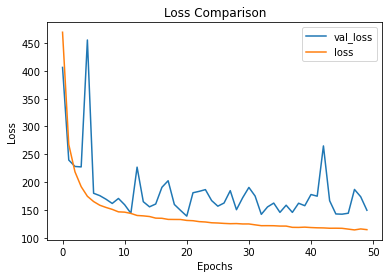

In [73]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['val_loss', 'loss'])
plt.show()

In [74]:
# Predict
y_predict = model.predict(x_test)
y_predict

array([[2888.138  ],
       [1894.9175 ],
       [1420.5421 ],
       ...,
       [ 401.96362],
       [ 291.6309 ],
       [ 168.14142]], dtype=float32)

In [75]:
# Make RMSE Function  
from sklearn.metrics import mean_squared_error

def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

print('RMSE : ', RMSE(y_test, y_predict))

RMSE :  258.45819443030774


In [76]:
# RandomForest Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,random_state=22)
rf.fit(x_train, y_train)
rf_result = rf.predict(x_test)
print('RMSE : ', RMSE(y_test, rf_result))

RMSE :  300.25042643576353


In [77]:
# XGB Model
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, random_state=22)
xgb.fit(x_train, y_train)
xgb_result = xgb.predict(x_test)
print('RMSE : ', RMSE(y_test, xgb_result))

RMSE :  298.5656819227734


In [78]:
# LGBM Model
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(n_estimators=100, random_state=22)
lgb.fit(x_train, y_train)
lgb_result = lgb.predict(x_test)
print('RMSE : ', RMSE(y_test, lgb_result))

RMSE :  319.6772267493003


In [79]:
dnn = pd.DataFrame(y_predict)
rf = pd.DataFrame(rf_result)
xgb = pd.DataFrame(xgb_result)
lgb = pd.DataFrame(lgb_result)
compare = pd.DataFrame(y_test).reset_index(drop=True)

In [80]:
compare.head()

,cnt
0,2997
1,1877
2,1178
3,922
4,578


In [83]:
compare['dnn'] = dnn
compare['rf'] = rf
compare['xgb'] = xgb
compare['lgb'] = lgb
compare.head()

,cnt,dnn,rf,xgb,lgb
0,2997,2888.137939,2712.66,2742.325684,2705.394820
1,1877,1894.917480,1682.90,1671.093506,1687.454041
2,1178,1420.542114,1218.19,1265.106567,1129.711214
3,922,1114.657104,911.81,965.357483,857.990253
4,578,813.880493,677.25,569.227539,702.130381


<AxesSubplot:xlabel='cnt', ylabel='Density'>

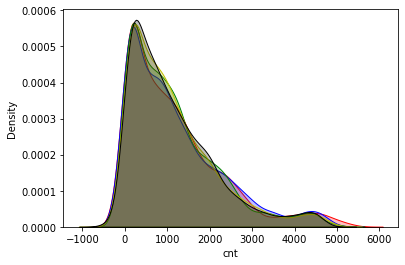

In [82]:
sns.kdeplot(compare['cnt'], shade=True, color='r')
sns.kdeplot(compare['dnn'], shade=True, color='b')
sns.kdeplot(compare['rf'], shade=True, color='g')
sns.kdeplot(compare['xgb'], shade=True, color='y')
sns.kdeplot(compare['lgb'], shade=True, color='k')